# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [89]:
import numpy as np
import matplotlib.pyplot as plt


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Question 1

In [91]:
model = HouseholdSpecializationModelClass() 
model.solve_discrete()

namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)

**Explain how you solve the model**

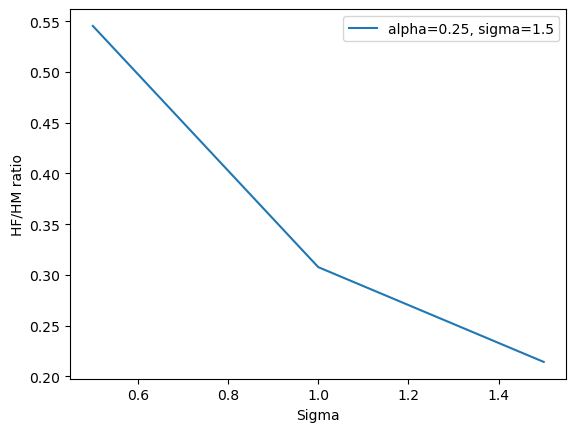

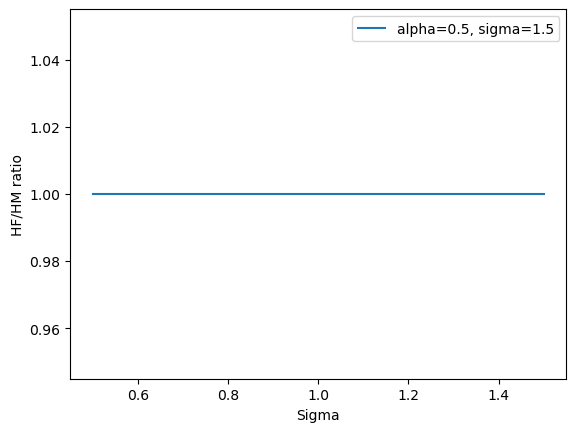

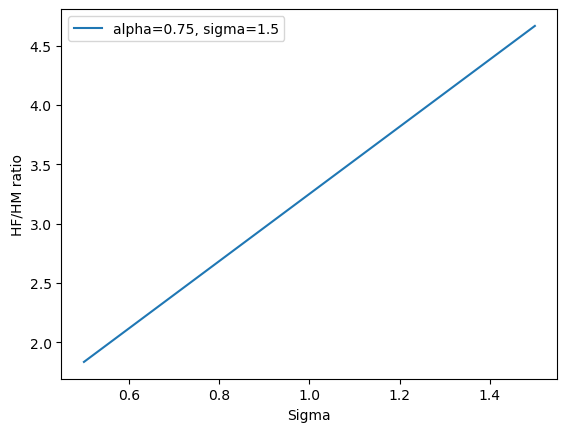

In [92]:

#parameters to loop over
# Loop over values of alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]


#The model with sigma=1
model= HouseholdSpecializationModelClass()

# Define grid of values for HM
HM_vals = np.linspace(0, 24, 48)

# Loop over values of alpha and sigma
for alpha in alpha_values:
    ratios = []
    for sigma in sigma_values:
        # Update parameters
        model.par.alpha=alpha
        model.par.sigma = sigma
        # Solve model for given parameters
        opt = model.solve_discrete()
        # Ratio HF/HM for each value of HM
        ratios.append(opt.HF / opt.HM)
        # Plot results
        label=f"alpha={alpha}, sigma={sigma}"
    plt.plot(sigma_values,ratios,label=label)
    plt.xlabel('Sigma')
    plt.ylabel('HF/HM ratio')
    plt.legend()
    plt.show()
       



# Question 2

Explain your code and procedure

[0.8, 0.9, 1.0, 1.1, 1.2]


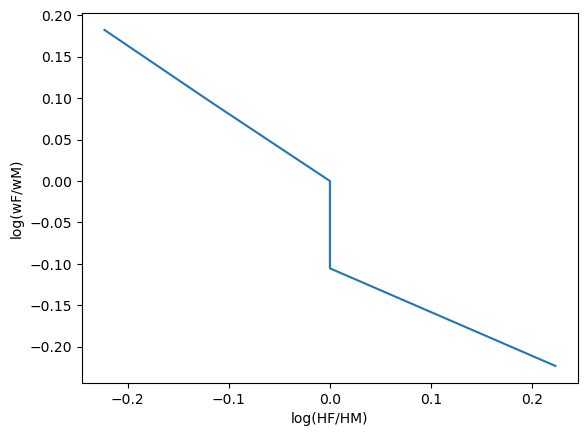

In [93]:

# Varying parameters
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]

#compute the values of HF/HM for each value of wF
model= HouseholdSpecializationModelClass()
HF_HM_values=[]
for wF in wF_values:
    model.par.wF = wF
    sol= model.solve_discrete()
    HF_HM=sol.HF/sol.HM
    HF_HM_values.append(np.log(HF_HM))


# Plot results
print(wF_values)
plt.plot(HF_HM_values,np.log(wF_values))
plt.xlabel("log(HF/HM)")
plt.ylabel("log(wF/wM)")
plt.show()


# Question 3

In [ ]:

from scipy.optimize import minimize

# solve the model for female wages

# set up modelparameters
par=self.par
sol=self.sol
opt=SimpleNamespace()

# vectors results 
par.lw_vec=np.zeros(len(par.wF_vec))
par.lH_vec=np.zeros(len(par.wF_vec))

sol.HM_vec=np.zeros(len(par.wF_vec))
sol.HF_vec=np.zeros(len(par.wF_vec))

#loop trough different values of wF
for i_w, wF in enumerate(par.wF_vec) :
    #change wF
    par.wF=wF
    #discrete model solving
    if descrete:
    #solve for discrete method
    opt =self.solve_discrete()
#continuous methood
    else:
    opt=self.solve_continuous()


# solve for continuously model

def solve_continuous(self,do_print=false):


    #parameters 
    par=self.par
    sol=self.par
    opt=SimpleNamespace()
 # bounds at 24 hours
 bnds =((0,24),(0,24),(0,24),(0,24))

# constraints, 24 hour max for H and L
cnst={'type':'ineq','fun':lambda x:24-x[0]-x[1],'type':'inep','fun':lambda x:24-x[2]-x[3]}

# creating objective fct for optimize 
def obj(x):
    return- self.calc_utility(x[0],x[1],x[2],x[3])

#optimizing 
res=optimze.minimize(obj,x0=4.5,4.5,4.5,4.5,metod='SLSQP', bounds=bnds,contraints=cnst,tol=1e-10)

#results
opt.LM=res.x[0]
opt.HM=res.x[1]
opt.LF=res.x[2]
opt.HF=res.x[3]
if do_print:
    print(res.massage)
    print(f'LM:{opt.LM:.4f}')
    print(f'HM:{opt.HM:.4f}')
    print(f'LF:{opt.LF:.4f}')
    print(f'HF:{opt.HF:.4f}')

#

# Question 4

Explain your code and procedure

In [ ]:
# Define the range of values for alpha and sigma
alpha_values = np.arange(0.1, 0.51, 0.01)
sigma_values = np.arange(0.1, 0.51, 0.01)

# Define the values of wF to use
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]

# Define the actual and estimated coefficients
beta0_actual = 0.4
beta1_actual = -0.1
beta0_estimated = np.zeros((len(wF_values), len(alpha_values), len(sigma_values)))
beta1_estimated = np.zeros((len(wF_values), len(alpha_values), len(sigma_values)))

# Iterate over all combinations of alpha and sigma
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        # Iterate over all values of wF
        for k, wF in enumerate(wF_values):
            # Compute the estimated coefficients for this wF value
            beta0_estimated[k, i, j] = alpha + beta0_actual / (wF ** sigma)
            beta1_estimated[k, i, j] = beta1_actual / (wF ** sigma)

# Compute the sum of squared differences between actual and estimated coefficients
ssd = np.sum((beta0_actual - beta0_estimated) * 2) + np.sum((beta1_actual - beta1_estimated) * 2)

# Find the values of alpha and sigma that minimize the sum of squared differences
min_ssd = np.min(ssd)
min_ssd_indices = np.unravel_index(np.argmin(ssd), ssd.shape)
min_alpha = alpha_values[min_ssd_indices[1]]
min_sigma = sigma_values[min_ssd_indices[2]]

print(f"Minimum SSD: {min_ssd}")
print(f"Optimal alpha: {min_alpha}")
print(f"Optimal sigma: {min_sigma}")